LEARNING DATA ANALYTICS IN PYTHON WITH THE HELP OF CHATGPT
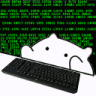


__________________________________________________________________________________________________________________________________________________________

In data analytics, one of the first steps in cleaning data is removing duplicates.Duplicates are rows that appear more than once in your dataset. So today we are going to learn about duplicates.

We’ll learn how to:

- Detect duplicates

- Count them

- Remove them safely

- Handle column-specific duplicates

- Control which duplicates to keep


In [53]:
#create a dataframe with duplicate values with letters
import pandas as pd

data = {
    'Name': ['Fish', 'JellyFish', 'StarFish', 'Whale','Fish'],
    'Life': [2, 100, 50, 30, 2],
    'Habitat': ['Ocean', 'Ocean', 'Ocean', 'Ice','Ocean']
}

df = pd.DataFrame(data)


displaying df

In [12]:
df

,Name,Life,Habitat
0,Fish,2,Ocean
1,JellyFish,100,Ocean
2,StarFish,50,Ocean
3,Whale,30,Ice
4,Fish,2,Ocean


1. Detect Duplicates!

In [ ]:
df.duplicated()#checks for duplicate rows

0    False
1    False
2    False
3    False
4     True
dtype: bool

If you want to check  one column 

In [16]:
df.duplicated(subset=['Name'])#checks for duplicate values in one column

0    False
1    False
2    False
3    False
4     True
dtype: bool

df.duplicated(subset=None, keep='first')
- Parameters:

- subset → which column(s) to check for duplicates (default: checks all columns)
- keep → which duplicates to mark as False (keep)

       - 'first' → marks duplicates after the first as True

       - 'last' → marks duplicates before the last as True

       - False → marks all duplicates as True  


In [21]:
print(df.duplicated(subset=None, keep='first'))
print("\n")
print(df.duplicated(subset=None, keep='last'))


0    False
1    False
2    False
3    False
4     True
dtype: bool


0     True
1    False
2    False
3    False
4    False
dtype: bool


2.count

In [24]:
print(df.duplicated().sum())#counts the number of duplicate rows

1


3. Removing duplicates

In [28]:
df.drop_duplicates(subset=None, keep='first')


,Name,Life,Habitat
0,Fish,2,Ocean
1,JellyFish,100,Ocean
2,StarFish,50,Ocean
3,StarFish,100,Underwater
4,Frog,5,Pond


In [55]:
df.loc[3]=['Whale',50,'Ocean']#adding another duplicate rows
df.loc[4]=['StarFish',int(50),'Ocean']
df.loc[5]=['Frog',5,'Pond']
df

,Name,Life,Habitat
0,Fish,2,Ocean
1,JellyFish,100,Ocean
2,StarFish,50,Ocean
3,Whale,50,Ocean
4,StarFish,50,Ocean
5,Frog,5,Pond


shows duplicate rows based on one column

In [ ]:
df[df.duplicated(subset=['Name'])] 

,Name,Life,Habitat
4,StarFish,50,Ocean


shows only duplicate rows

In [ ]:
df[df.duplicated()]

,Name,Life,Habitat
4,StarFish,50,Ocean


This line is for checking if two rows are exactly the same

In [ ]:
print(df.loc[2])
print(df.loc[4])
print(df.loc[2] == df.loc[4]) # just keep this little thing in your mind, you might find it useful later when comparing rows




Name       StarFish
Life             50
Habitat       Ocean
Name: 2, dtype: object
Name       StarFish
Life             50
Habitat       Ocean
Name: 4, dtype: object
Name       True
Life       True
Habitat    True
dtype: bool


4. Handle column-specific duplicates

* Duplicates based on a single column

In [60]:
df[df.duplicated('Name')]


,Name,Life,Habitat
4,StarFish,50,Ocean


* Duplicates based on multiple columns

In [61]:
df[df.duplicated(['Name', 'Life'])]


,Name,Life,Habitat
4,StarFish,50,Ocean


5. Control which duplicates to keep


We have a parameter called 'keep'

- keep = 'first' =	Keep the first occurrence, later duplicates are marked as True.
- keep= 'last'   =    Keep the last occurrence, earlier duplicates are marked as True.
- keep='False'   =    Don’t keep any duplicates ,means, all copies are marked as True 
- lets look at the examples

In [ ]:
df.duplicated(keep='first')


0    False
1    False
2    False
3    False
4     True
5    False
dtype: bool

In [66]:
df.duplicated(keep='last')

0    False
1    False
2     True
3    False
4    False
5    False
dtype: bool

In [67]:
df.duplicated(keep=False)

0    False
1    False
2     True
3    False
4     True
5    False
dtype: bool

To display only the duplicates (including all their copies).

In [ ]:
df[df.duplicated(keep=False)]

,Name,Life,Habitat
2,StarFish,50,Ocean
4,StarFish,50,Ocean
